In [2]:
import os
os.chdir("/Users/minhyeong-gyu/Documents/GitHub/quantum_kernel_investigation/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Quantum_Kernel import *
import time

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit , transpile, Aer ,IBMQ
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import QasmSimulator

from qiskit import Aer, QuantumCircuit
from qiskit.algorithms.optimizers import *

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Loading your IBM Quantum account(s)
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q-kqc', group='internal', project='default')

In [4]:
n_samples = 200
blobs_params = dict(random_state=0, n_samples=n_samples, n_features=2)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles,make_blobs,make_moons,make_classification

np.random.seed(0)

data0_X,data0_y = make_circles(n_samples=n_samples, factor=.5, noise=.025)
data0_X = data0_X*5
data1_X,data1_y = make_moons(n_samples=n_samples, noise=0.025, random_state=0)
data2_X,data2_y = make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1, 1], **blobs_params)
data3_X,data3_y = make_blobs(centers=[[1, 1], [-1, -1]], cluster_std=[1, 1], **blobs_params)
data4_X,data4_y = make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
data4_X += rng.uniform(size=data4_X.shape)*2

datasets_X = [data0_X,data1_X,data2_X,data3_X,data4_X]
datasets_y = [data0_y,data1_y,data2_y,data3_y,data4_y]


In [5]:
datasets_X_S = []
for i in range(5):
    data_temp = datasets_X[i]
    data_temp_scale = np.pi*(data_temp-np.min(data_temp))/(np.max(data_temp)-np.min(data_temp))
    datasets_X_S += [np.array(data_temp_scale)]

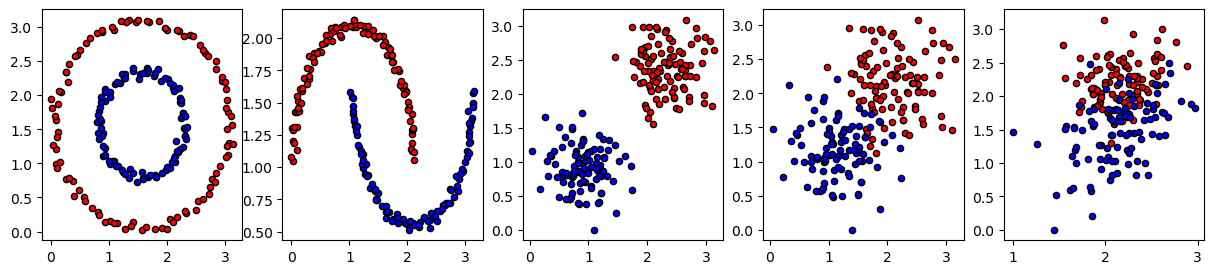

In [6]:
plt.figure(figsize=(15,3))
for i in range(5):
    reds = datasets_y[i] == 0
    blues = datasets_y[i] == 1

    plt.subplot(1,5,i+1)
    plt.scatter(datasets_X_S[i][reds,0], datasets_X_S[i][reds,1], c="red",s=20, edgecolor='k')
    plt.scatter(datasets_X_S[i][blues,0],datasets_X_S[i][blues,1], c="blue",s=20, edgecolor='k')
    

In [7]:
datasets_y_sto = []
datasets_test_y_sto =[]
sto_index_sets = []
sto_index_test_sets = []
gram_gaussian_set = []
gram_gaussian_test_set = []
gram_kernel_set = []
gram_kernel_test_set = []
gram_zz_kernel_set = []
gram_zz_kernel_test_set = []
comp=3


sample = 200
test_sample = 200
backend = QasmSimulator()

for i in range(5) :
    sto_ind = np.random.randint(0,len(datasets_X_S[i]),sample)
    data_sto = pd.DataFrame(datasets_X_S[i]).iloc[sto_ind,:]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    sto_index_sets += [sto_ind]
    
    sto_ind = np.random.randint(0,len(datasets_X_S[i]),test_sample)
    data_sto_test = pd.DataFrame(datasets_X_S[i]).iloc[sto_ind,:]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
    sto_index_test_sets += [sto_ind]

    gram_gaussian_matrix = Gram_gaussian(data=data_sto.values,comp=comp)
    gram_gaussian_test_matrix = Gram_gaussian_test(data_sto.values,data_sto_test.values,comp=comp)
    gram_gaussian_set += [gram_gaussian_matrix]
    gram_gaussian_test_set += [gram_gaussian_test_matrix]


    gram_matrix = get_gram(data=data_sto,kernel_fun=exponential_kernel_B,layer=3,backend=backend,shots=1000)
    gram_test_matrix = get_gram_test(data=data_sto,test_data = data_sto_test,kernel_fun=exponential_kernel_B,layer=3,backend=backend,shots=1000)
    gram_kernel_set += [gram_matrix]
    gram_kernel_test_set += [gram_test_matrix]
    

    gram_zz_matrix = get_gram(data=data_sto,kernel_fun=zz_kernel,layer=2,backend=backend,shots=1000)
    gram_zz_test_matrix = get_gram_test(data=data_sto,test_data = data_sto_test,kernel_fun=zz_kernel,layer=2,backend=backend,shots=1000)
    gram_zz_kernel_set += [gram_zz_matrix]
    gram_zz_kernel_test_set += [gram_zz_test_matrix]
    
    datasets_y_sto += [np.array(data_sto_y)]
    datasets_test_y_sto += [np.array(data_sto_test_y)]
    

100%|██████████| 200/200 [37:22<00:00, 11.21s/it]


In [9]:
save_folder = "Result/svm_data5"
for i in range(5):
   pd.DataFrame(gram_gaussian_set[i]).to_csv(save_folder+"/gram_gaussian_"+str(i)+".csv")
   pd.DataFrame(gram_gaussian_test_set[i]).to_csv(save_folder+"/gram_gaussian_test"+str(i)+".csv")
   pd.DataFrame(gram_kernel_set[i]).to_csv(save_folder+"/gram_kernel"+str(i)+".csv")
   pd.DataFrame(gram_kernel_test_set[i]).to_csv(save_folder+"/gram_kernel_test"+str(i)+".csv")
   pd.DataFrame(gram_zz_kernel_set[i]).to_csv(save_folder+"/gram_zz_kernel"+str(i)+".csv")
   pd.DataFrame(gram_zz_kernel_test_set[i]).to_csv(save_folder+"/gram_zz_kernel_test"+str(i)+".csv")
   
   pd.DataFrame(datasets_X_S[i]).to_csv(save_folder+"/datasets_X_S"+str(i)+".csv")
   pd.DataFrame(datasets_y[i]).to_csv(save_folder+"/datasets_y"+str(i)+".csv")
   pd.DataFrame(sto_index_sets[i]).to_csv(save_folder+"/sto_index_sets"+str(i)+".csv")
   pd.DataFrame(sto_index_test_sets[i]).to_csv(save_folder+"/sto_index_test_sets"+str(i)+".csv")